**Installing of all neccessary modules**

In [1]:
%pip install torch

Defaulting to user installation because normal site-packages is not writeable


In [2]:
%pip install accelerate

Defaulting to user installation because normal site-packages is not writeable
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
%pip install diffusers

Defaulting to user installation because normal site-packages is not writeable
  Using cached charset_normalizer-2.0.12-py3-none-any.whl (39 kB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
%pip install transformers

Defaulting to user installation because normal site-packages is not writeable
  Using cached charset_normalizer-2.0.12-py3-none-any.whl (39 kB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:
from diffusers import DiffusionPipeline
import torch
import os

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

***User's promt***

In [6]:
compressed_text = '''Your text here'''

**Build pretrained model using specific style**

In [9]:
pipeline = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16)
pipeline.load_lora_weights("nerijs/pixel-art-xl")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

**Make request**

In [10]:
pipeline.to("cuda")
image = pipeline(compressed_text, negative_prompt='ugly, tiling, poorly drawn hands, poorly drawn feet, poorly drawn face, out of frame, extra limbs, disfigured, deformed, body out of frame, blurry, bad anatomy, blurred, watermark, grainy, signature, cut off, draft').images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

**Other**

In [ ]:
os.stat('./out.jpg').st_size / 1024 / 1024

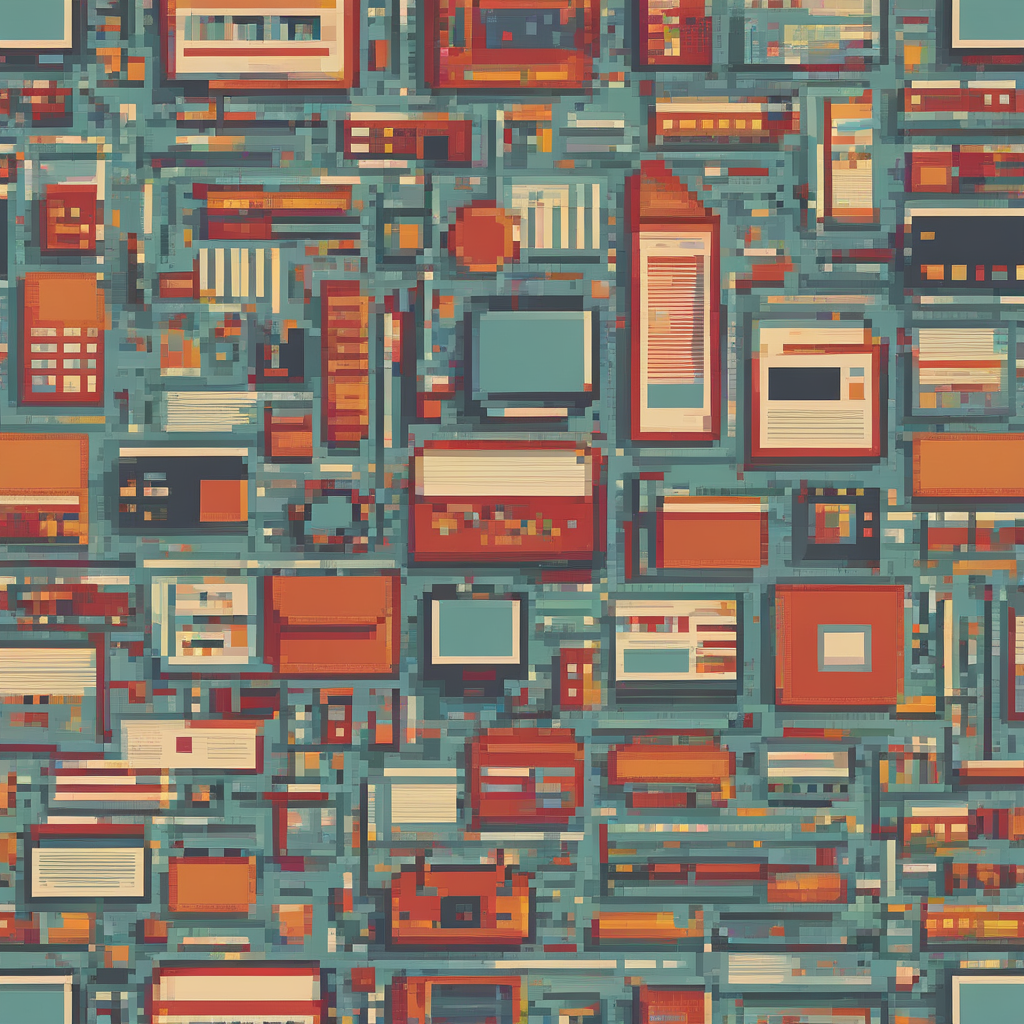

In [11]:
image